In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\Downloads\SOCR-HeightWeight (1).csv')

In [3]:
df.head(5)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


c:\Users\91638\anaconda3\ANACONDA NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height(Inches)'>

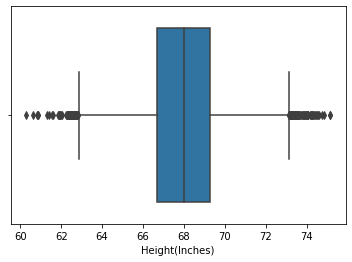

In [4]:
sns.boxplot(df['Height(Inches)'])

c:\Users\91638\anaconda3\ANACONDA NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight(Pounds)'>

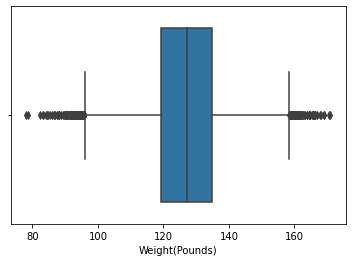

In [5]:
sns.boxplot(df['Weight(Pounds)'])

In [10]:
df['Height(Inches)'].describe

<bound method NDFrame.describe of 0        65.78331
1        71.51521
2        69.39874
3        68.21660
4        67.78781
           ...   
24995    69.50215
24996    64.54826
24997    64.69855
24998    67.52918
24999    68.87761
Name: Height(Inches), Length: 25000, dtype: float64>

In [5]:
df['kg']=(df['Weight(Pounds)']/2.205)

In [7]:
 data=df[['Height(Inches)','kg']]

In [8]:
data.rename(columns={'Height(Inches)':'height'},inplace=True)

c:\Users\91638\anaconda3\ANACONDA NEW\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
def loss(m,c,points):
  error=0
  for i in range(len(points)):
    x=points.iloc[i].height
    y=points.iloc[i].kg
    error+=(y-(m*x+c))**2
  r=error/float(len(points))
  return r  

In [10]:
def gradient_descent(m1,c1,points,l):
  m=0
  c=0
  n=len(points)
  for i in range(n):
    x=points.iloc[i].height
    y=points.iloc[i].kg
    m+=-(2/n)*x*(y-(m1*x+c1))
    c+=-(2/n)*(y-(m1*x+c1))
  m=m1-m*l
  c=c1-c*l
  return m,c 

In [13]:
m=0
c=0
l=0.0001
loop=500
for i in range(loop):
  m,c=gradient_descent(m,c,data,l)
  los=loss(m,c,data)
  if(i%25==0):
    print("epochs: ",i," ","intercept : ",c," ","slope : ",m," ","loss : ",los)

epochs:  0   intercept :  0.01152647810982313   slope :  0.7847325262525431   loss :  40.44171130942681
epochs:  25   intercept :  0.01230794507683656   slope :  0.8478705186039378   loss :  21.99116831842517
epochs:  50   intercept :  0.01216157593746211   slope :  0.8478726696270846   loss :  21.991159747005124
epochs:  75   intercept :  0.012015207369977571   slope :  0.8478748206418272   loss :  21.991151175652153
epochs:  100   intercept :  0.011868839374380704   slope :  0.8478769716481653   loss :  21.991142604366086
epochs:  125   intercept :  0.01172247195066927   slope :  0.8478791226460991   loss :  21.99113403314682
epochs:  150   intercept :  0.011576105098841041   slope :  0.8478812736356285   loss :  21.991125461994788
epochs:  175   intercept :  0.01142973881889379   slope :  0.8478834246167536   loss :  21.991116890909428
epochs:  200   intercept :  0.011283373110825261   slope :  0.8478855755894744   loss :  21.991108319891257
epochs:  225   intercept :  0.01113700797

<function matplotlib.pyplot.show(close=None, block=None)>

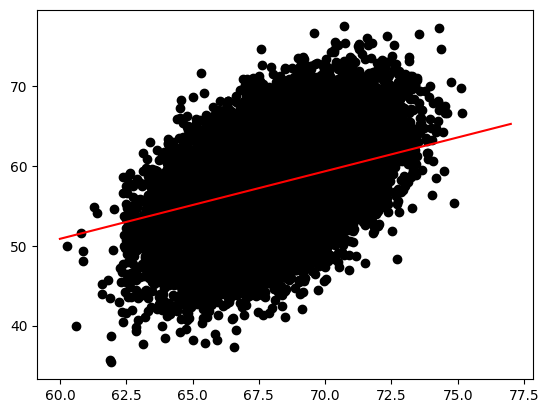

In [32]:
plt.scatter(data.height,data.kg,color='black')
plt.plot(list(range(60,78)),[m*x+c for x in range(60,78)],color='red') 
plt.show

In [23]:
m*65.78331+c

55.78794482158647

In [32]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
x=data['height']
y=data['kg']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.25780546224369916


In [57]:
regr.coef_

array([1.38967334])

In [58]:
regr.intercept_

-36.84139090629467

In [59]:
regr.coef_*65.78331	+regr.intercept_

array([54.57592108])

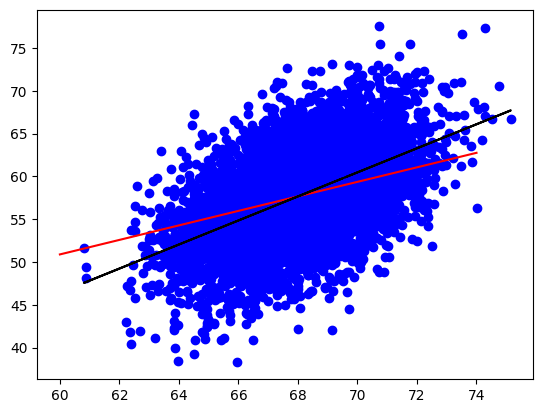

In [33]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(list(range(60,75)),[m*x+c for x in range(60,75)],color="red")
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values


In [18]:
data.head(5)

,height,kg
0,65.78331,51.243764
1,71.51521,61.899002
2,69.39874,69.399955
3,68.21660,64.551202
4,67.78781,65.440862


In [35]:
m*71.51521+c

60.64808760533449

In [60]:
regr.coef_*71.51521+regr.intercept_

array([62.54138969])

In [22]:
import pickle

In [74]:
with open('model.pkl','wb') as f:
    pickle.dump(regr,f)

In [76]:
with open('model.pkl','rb') as f:
    np=pickle.load(f)

In [77]:
b=71.51521	
np.predict([[b]])

array([62.54138969])

In [79]:
np.predict([[55]])

array([39.59064268])